<a href="https://colab.research.google.com/github/yjh617/Pytorch-UNet/blob/one_classes/%E8%AE%AD%E7%BB%83%E6%A8%A1%E5%9E%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
workroot = "/content/drive/MyDrive/Colab Notebooks/Pytorch-UNet-master"
os.chdir(workroot)

In [ ]:
#!pip install wandb

In [ ]:
from unet.unet_model import *
from unet.unet_parts import *

In [ ]:
from train import *
from predict import *

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = torch.load("model_oneclass.pth")
model = model.to(device)

In [ ]:
!nvidia-smi

Sun Mar  5 10:43:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    30W /  70W |    707MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
train_model(model,device,img_scale=1, epochs=20, batch_size=8)

100%|██████████| 192/192 [00:01<00:00, 154.13it/s]


epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇████
learning rate,██▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train loss,█▄▃▅▆▃▄▃▃▃▂▂▂▃▅▂▃▃▃▂▃▄▃▂▂▂▄▃▄▄▁▄▂▄▄▃▃▃▄▄
validation Dice,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,20
learning rate,0.0
step,120
train loss,0.44163
validation Dice,0.0


Epoch 20/20: 100%|██████████| 173/173 [00:28<00:00,  6.02img/s, loss (batch)=0.26]


In [ ]:
torch.save(model, "model_oneclass.pth")

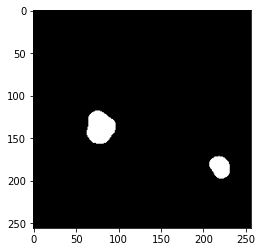

In [ ]:
filename = ("/content/drive/MyDrive/Colab Notebooks/Pytorch-UNet-master/data/imgs/100.png")
img = Image.open(filename)
test_pre = predict_img(model, img, device)
plt.imshow(test_pre,cmap="gray")